In [ ]:
import pandas as pd;
from google.colab import files

import io

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier


In [ ]:
uploaded = files.upload()

Saving cleaned_adult.csv to cleaned_adult (1).csv


Let's see what the data looks like:

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cleaned_adult.csv']))
df.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## **The Data**

***age***: continuous.

***workclass***: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

***fnlwgt***: continuous.

***education***: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

***education-num***: continuous.

***marital-status***: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

***occupation***: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

***relationship***: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

***race***: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.

***capital-gain***: continuous.

***capital-loss***: continuous.

***hours-per-week***: continuous.

***native-country***: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


***income***: 0 indicates income “<=50K” and 1 indicates income “>50K”

### **Training/ Test Split**

Split the data into a training and test set after first shuffling the examples so that they are in a random order. For any training/test split, a good rule of thumb is 80% for the training set and 20% for the test set.


In [ ]:
# Split dataset into training set and test set
features = df.drop(['income'], axis=1)
labels = df[['income']]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, shuffle = True) # 80% training and 20% test

# **(a) Decision Tree**

Keep all hyperparameters fixed to see how well the model work on the training set and test set.



In [ ]:
decision_tree = DecisionTreeClassifier(random_state=40) #All hyperparameters are fixed. criterian is the the Gini impurity as it is the default. Don't need to specify.

# Train Decision Tree Classifer
decision_tree.fit(X_train, y_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of train:",decision_tree.score(X_train,y_train))

print("Accuracy of test:",decision_tree.score(X_test,y_test))

Accuracy of train: 0.9998894325123697
Accuracy of test: 0.8106135986733002


The model performs better on the training set (99.99%) than on the test set (81.06%), this means that the model is likely overfitting.

We will now try to use different types of pruning methods (pre and post) to reduce the models likelihood of overfitting as much as possible.

### **Pre pruning by way of hyperparameter tuning**

The parameters to be controlled:



*   Training set size
*   Max depth
*   Min sample split




The code for the last two were taken from [an article on kaggle.](https://www.kaggle.com/code/drgilermo/playing-with-the-knobs-of-sklearn-decision-tree/notebook) The code used to plot all the graphs was taken from this same article.



### **Training set size**-

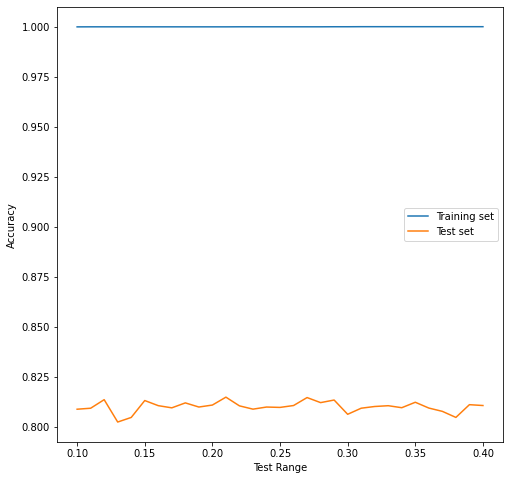

In [ ]:
test_score = []
train_score = []
test_range = np.arange(0.1,0.4,0.01)
for tr in test_range:
    X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(features, labels, test_size=tr, random_state=1, shuffle = True)
    decision_tree1 = DecisionTreeClassifier() #All other hyperparameters are fixed.
    decision_tree1.fit(X_trainnew, y_trainnew)
    train_score.append(decision_tree1.score(X_trainnew,y_trainnew))
    test_score.append(decision_tree1.score(X_testnew,y_testnew))

plt.figure(figsize = (8,8))
plt.plot(test_range,train_score)
plt.plot(test_range, test_score)
plt.xlabel('Test Range')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])




The training score is constant and close to 100%, while the validation score is much lower. A case of over-fitting. This is becaause the tree depth hasn't been limited so the model keeps creating new knobs until all the leaves are "pure".

I will first find the max depth of the decision tree that gives the best possible outcome and then run the above code again.

**Max depth-**

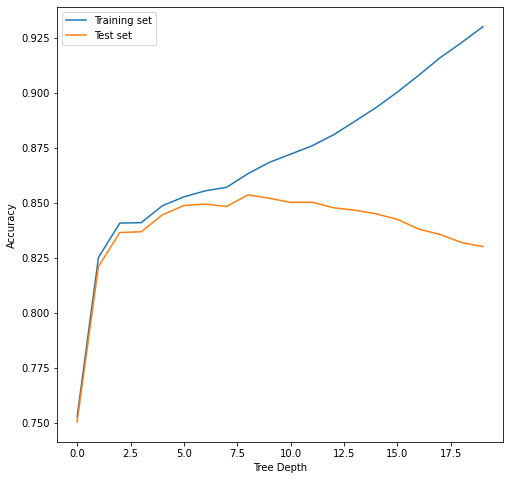

In [ ]:
test_score = []
train_score = []
for depth in range(20):
    dt2 = DecisionTreeClassifier(max_depth = depth + 1)
    dt2.fit(X_train,y_train)
    train_score.append(dt2.score(X_train,y_train))
    test_score.append(dt2.score(X_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(range(20),train_score)
plt.plot(range(20), test_score)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

When max_depth is more than 6 (roughly) the models likelihood of overfitting increases. The deeper the tree gets the model seems to overfit more.

Taking max depth as 6 running "Training set size" code again.

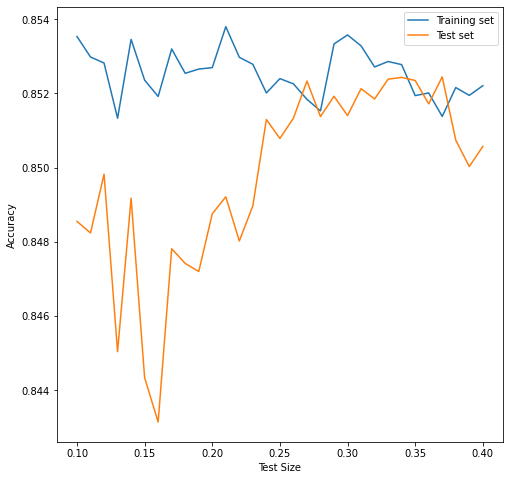

In [ ]:
test_score = []
train_score = []
test_range = np.arange(0.1,0.4,0.01)
for tr in test_range:
    X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(features, labels, test_size=tr, random_state=1, shuffle = True)
    dt1 = DecisionTreeClassifier(max_depth = 6) #All other hyperparameters are fixed.
    dt1.fit(X_trainnew, y_trainnew)
    train_score.append(dt1.score(X_trainnew,y_trainnew))
    test_score.append(dt1.score(X_testnew,y_testnew))

plt.figure(figsize = (8,8))
plt.plot(test_range,train_score)
plt.plot(test_range, test_score)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

When test size is around 0.34 is when the model will achieve the highest
accuracy scores while not overfitting. The model also seems less likely to overfit/underfit the data as the test size increases.

**Min sample split-**

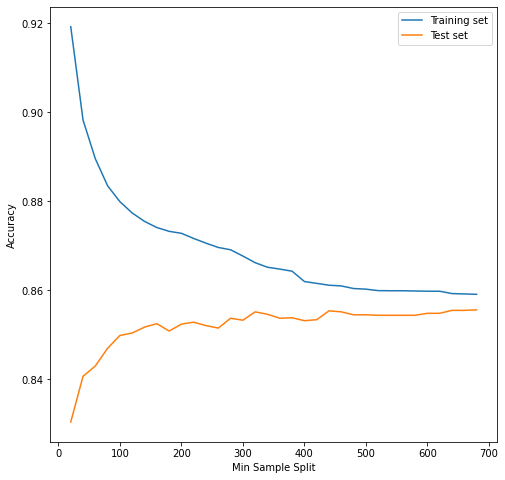

In [ ]:
test_score = []
train_score = []
min_sample_split = np.arange(20,700,20)
for split in min_sample_split:
    dt3 = DecisionTreeClassifier(min_samples_split = split, random_state=1)
    dt3.fit(X_train,y_train)
    train_score.append(dt3.score(X_train,y_train))
    test_score.append(dt3.score(X_test,y_test))
    
plt.figure(figsize = (8,8))   
plt.plot(min_sample_split,train_score)
plt.plot(min_sample_split, test_score)
plt.xlabel('Min Sample Split')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

The sample split is the minimum number of samples required to split an internal node. And even though the training accuracy decreases as we increase the sample split the chance of overfitting is significantly reduced. After sample_split>450 the likelihood of overfitting stays the same.

### Post Pruning - Cost Complexity Pruning

Finding the right parameter for alpha.

The code below is taken from [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/#:~:text=We%20will%20use%20DecisionTreeClassifier%20from,part%20respectively%20as%20shown%20below.) with a few modifications of my own.

In [ ]:
path = dt1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 3.80136197e-06 2.75605723e-05 2.76056914e-05
 3.87529460e-05 4.08196914e-05 4.14628079e-05 5.50711140e-05
 6.79390313e-05 6.81860068e-05 7.88642763e-05 8.59969348e-05
 1.21979686e-04 1.31260540e-04 1.42591660e-04 1.72173019e-04
 1.76755709e-04 1.79357315e-04 1.80840250e-04 1.90029226e-04
 2.10409423e-04 2.80568970e-04 3.88861988e-04 3.89418521e-04
 5.09796616e-04 5.81137663e-04 7.86708185e-04 9.55444971e-04
 9.68911343e-04 1.10857433e-03 1.68069467e-03 2.23189027e-03
 2.34822681e-03 2.66046909e-03 2.89718542e-03 3.61291597e-03
 4.01164814e-03 4.68886097e-03 1.41358835e-02 1.66665817e-02
 2.99231662e-02 7.34702652e-02]


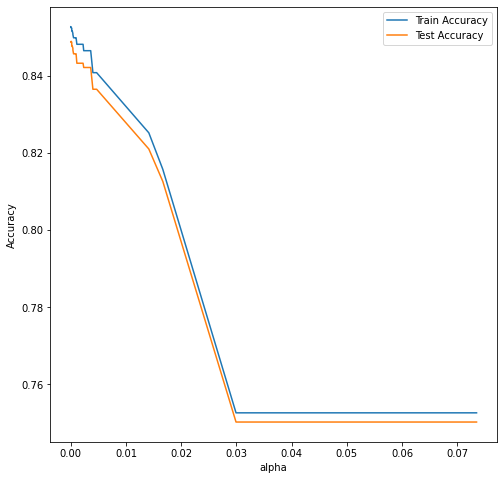

In [ ]:
# For each alpha we will append our model to a list
train_acc = []
test_acc = []
for ccp_alpha in ccp_alphas:
    dt4 = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth = 6, random_state = 40)

    dt4.fit(X_train, y_train)

    train_acc.append(dt4.score(X_train,y_train))
    test_acc.append(dt4.score(X_test,y_test))


plt.figure(figsize = (8,8))   
plt.plot(ccp_alphas,train_acc)
plt.plot(ccp_alphas, test_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Test Accuracy'])


There's little to no overfitting at any point but both the training and test accuracy seem to decrease as the value of alpha increase until around 0.03 and then the training and test accuracy stays constant (around 0.75) with a little bit of overfitting.

# **(b) Randm Forest**

Keep all hyperparameters fixed to see how well the model work on the training set and test set.

In [ ]:
#n_estimators=100 (default), max_features='sqrt' (default), Training set size is 0.8 defined earlier above.
RandomForest1=RandomForestClassifier(n_estimators=100, random_state=40) 

RandomForest1.fit(X_train,y_train.values.ravel())

# Model Accuracy, how often is the classifier correct?
print("Accuracy of training set:",RandomForest1.score(X_train,y_train.values.ravel()))

print("Accuracy of test set:",RandomForest1.score(X_test,y_test.values.ravel()))


Accuracy of training set: 0.9998341487685546
Accuracy of test set: 0.849640685461581


Training set is overfitting by 0.15 which is concerning.

### **Hyperparameter Tuning**

*  Max depth
*  Random features - max_features
*  Number of trees - n_estimators   
*  Training set size





### **1) Max Depth**

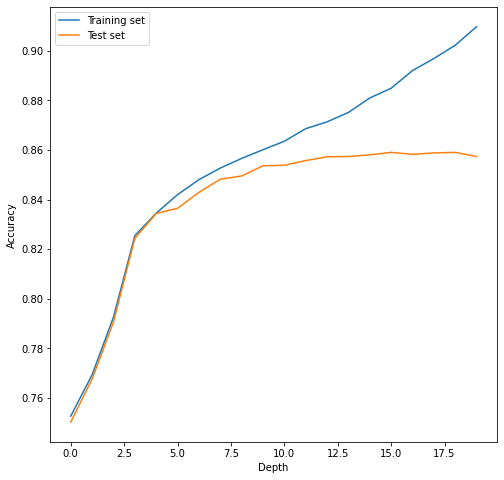

In [ ]:
test_score = []
train_score = []
for depth in range(20):
    RandomForest2 = RandomForestClassifier(n_estimators=100, random_state=40, max_depth=depth+1)
    RandomForest2.fit(X_train,y_train.values.ravel())
    train_score.append(RandomForest2.score(X_train,y_train.values.ravel()))
    test_score.append(RandomForest2.score(X_test,y_test.values.ravel()))

plt.figure(figsize = (8,8))
plt.plot(range(20),train_score)
plt.plot(range(20), test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

In [ ]:
rf2=RandomForestClassifier(n_estimators=100, random_state=40, max_depth=5) 

rf2.fit(X_train,y_train.values.ravel())

# Model Accuracy, how often is the classifier correct?
print("Accuracy of training set (max_depth=5):",rf2.score(X_train,y_train.values.ravel()))

print("Accuracy of test set (max_depth=5):",rf2.score(X_test,y_test.values.ravel()))

Accuracy of training set (max_depth=5): 0.8345081128894049
Accuracy of test set (max_depth=5): 0.834383637368712


In [ ]:
rf3=RandomForestClassifier(n_estimators=100, random_state=40, max_depth=6) 

rf3.fit(X_train,y_train.values.ravel())

# Model Accuracy, how often is the classifier correct?
print("Accuracy of training set (max_depth=6):",rf3.score(X_train,y_train.values.ravel()))

print("Accuracy of test set (max_depth=6):",rf3.score(X_test,y_test.values.ravel()))

Accuracy of training set (max_depth=6): 0.8419714183044475
Accuracy of test set (max_depth=6): 0.8364842454394693


Until the max depth is about 5 the training test error are very similar but after that the model soon starts to overfit.

For the rest of the hyperparameter tuning code the max_depth will be set to 5 because otherwise the training accuracy will always be close to 1.

### **2) Random features - max features**

In [ ]:
RandomForest3=RandomForestClassifier(max_features='sqrt', random_state=40, max_depth = 5) 

RandomForest3.fit(X_train,y_train.values.ravel())
print("Accuracy of train:",RandomForest3.score(X_train,y_train.values.ravel()))
print("Accuracy of test:",RandomForest3.score(X_test, y_test.values.ravel()))



Accuracy of train: 0.8345081128894049
Accuracy of test: 0.834383637368712


In [ ]:
RandomForest4=RandomForestClassifier(max_features='log2', random_state=40, max_depth = 5) 

RandomForest4.fit(X_train,y_train.values.ravel())
print("Accuracy of train:",RandomForest4.score(X_train,y_train.values.ravel()))
print("Accuracy of test:",RandomForest4.score(X_test, y_test.values.ravel()))

Accuracy of train: 0.8144401138845122
Accuracy of test: 0.8119402985074626


In [ ]:
RandomForest5=RandomForestClassifier(max_features=None, random_state=40, max_depth = 5) 

RandomForest5.fit(X_train,y_train.values.ravel())
print("Accuracy of train:",RandomForest5.score(X_train,y_train.values.ravel()))
print("Accuracy of test:",RandomForest5.score(X_test,y_test.values.ravel()))

Accuracy of train: 0.8500152030295491
Accuracy of test: 0.8451077943615257


Even though max_features=None is when the model overfits the most, it is the best option as it gives the best training and test accuracy.

### 3) Number of trees - n estimators 

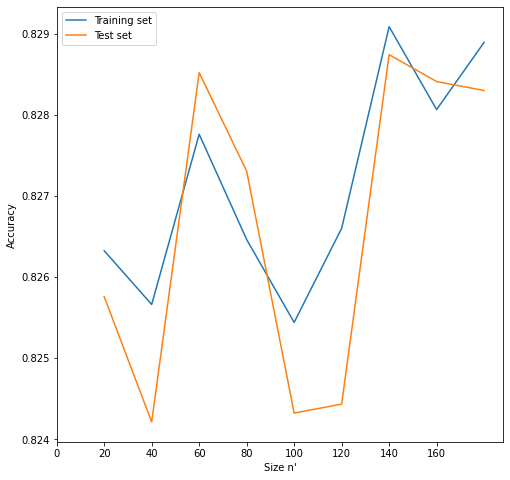

In [ ]:
test_score = []
train_score = []
size_n = np.arange(20,200,20)
for size in size_n:
    RandomForest6 = RandomForestClassifier(n_estimators=size,max_depth = 4.5, random_state=40)
    RandomForest6.fit(X_train,y_train.values.ravel())
    train_score.append(RandomForest6.score(X_train,y_train.values.ravel()))
    test_score.append(RandomForest6.score(X_test,y_test.values.ravel()))
    
plt.figure(figsize = (8,8))   
plt.plot(size_n,train_score)
plt.plot(size_n, test_score)
plt.xticks(ticks=np.arange(0,180,20))
plt.xlabel("Size n'")
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

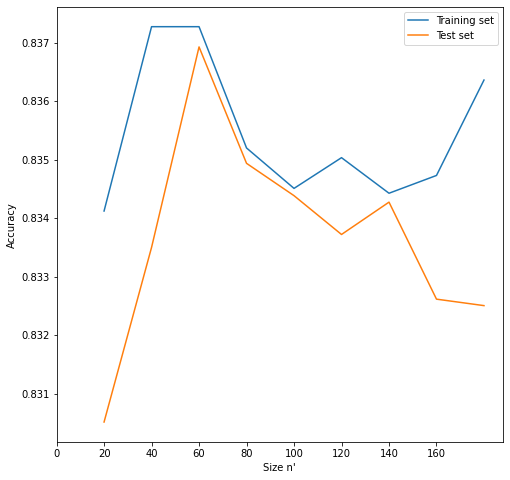

In [ ]:
test_score = []
train_score = []
size_n = np.arange(20,200,20)
for size in size_n:
    RandomForest6 = RandomForestClassifier(n_estimators=size,max_depth = 5, random_state=40)
    RandomForest6.fit(X_train,y_train.values.ravel())
    train_score.append(RandomForest6.score(X_train,y_train.values.ravel()))
    test_score.append(RandomForest6.score(X_test,y_test.values.ravel()))
    
plt.figure(figsize = (8,8))   
plt.plot(size_n,train_score)
plt.plot(size_n, test_score)
plt.xticks(ticks=np.arange(0,180,20))
plt.xlabel("Size n'")
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

The difference between these two plots is that in the first one the max depth = 4.5 but in the second plot the max_depth = 5. There are a few points in the first  plot where the models test and train accuracy seem to be exactly the same which looks better compared to the second model where it always seems to overfit (Although not by a lot). However, looking at the range of the test/training accuracy score, when max_depth is 5 it is much higher (0.832 and 0.837) compared to the first plot (0.824 and 0.829). Therefore the model where max_depth is 5 would be the the one to choose.

In [ ]:
rf4=RandomForestClassifier(random_state=40, max_depth = 5, n_estimators = 75 ) 

rf4.fit(X_train,y_train.values.ravel())
print("Accuracy of train (n_estimators = 75):",rf4.score(X_train,y_train.values.ravel()))
print("Accuracy of test (n_estimators = 75):",rf4.score(X_test,y_test.values.ravel()))

Accuracy of train (n_estimators = 75): 0.8351438759432789
Accuracy of test (n_estimators = 75): 0.8352681039248203


When max_depth=5 and  n' = 75 (approximately) the training and test accuracy are high (0.8285) and with only a little bit of overfitting.

### **4) Training Set Size**

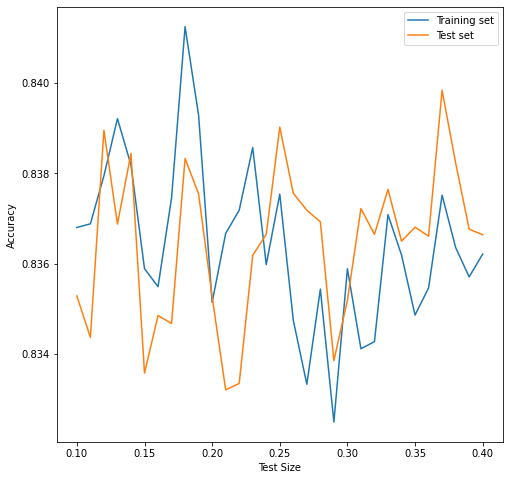

In [ ]:
test_score = []
train_score = []
test_range = np.arange(0.1,0.4,0.01)
for tr in test_range:
    X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(features, labels, test_size=tr, random_state=1, shuffle = True)
    RandomForest7 =  RandomForestClassifier(n_estimators=75,max_depth = 5, random_state=40) #All other hyperparameters are fixed.
    RandomForest7.fit(X_trainnew, y_trainnew.values.ravel())
    train_score.append(RandomForest7.score(X_trainnew,y_trainnew.values.ravel()))
    test_score.append(RandomForest7.score(X_testnew,y_testnew.values.ravel()))

plt.figure(figsize = (8,8))
plt.plot(test_range,train_score)
plt.plot(test_range, test_score)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

When test size is around 24% the model's training and test accuracy is almost the same When test size < 24% the model is likely to overfit and when test size > 24% it's likely to underfit. But overall I don't think the test size matters a lot because the other hyperparameters are fixed at a position where the model could get the highest possible training and test accuracy while keeping the over and underfitting to a minimum therefore the accuracy scores here range between 0.832 and 0.842.

### **OOB Error**

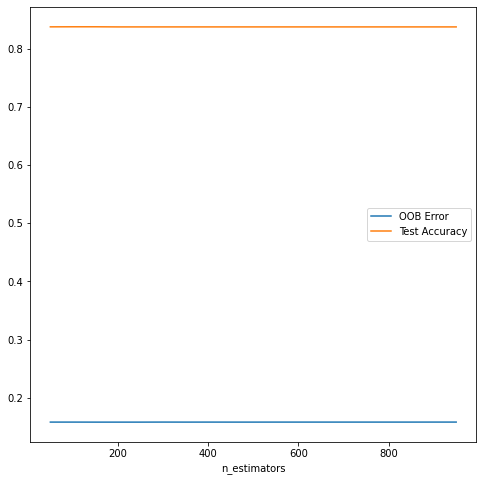

In [53]:
oob_error = []
validation_score = []


rf8 =  RandomForestClassifier(warm_start=True, max_depth=4.5, max_features=None, oob_score=True, random_state=40)


size_n = np.arange(50,1000,50)
for size in size_n:
  rf8.set_params(n_estimators=size)
  rf8.fit(X_train, y_train.values.ravel())

  oob = 1 - rf8.oob_score_
  oob_error.append(oob)  

  validation_score.append(rf8.score(X_test,y_test.values.ravel()))


plt.figure(figsize = (8,8))
plt.plot(size_n,oob_error)
plt.plot(size_n,validation_score)
plt.xlabel('n_estimators')
# plt.ylabel('OOB Error')
plt.legend(['OOB Error', 'Test Accuracy'])



# plt.figure(figsize = (8,8))
# plt.plot(test_range,train_score)

# plt.xlabel('Test Size')
# plt.ylabel('Accuracy')
# plt.legend(['Training set','Test set'])

The test accuracy is much higher than the oob error which is what we want to achieve.

In [ ]:

# from sklearn.utils import check_random_state 

# RandomForest8 = RandomForestClassifier(n_estimators=75,max_depth = 5, random_state=40)
# RandomForest8.fit(X_train, y_train.values.ravel())
# n_samples = len(X_train)
# n_samples_bootstrap = n_samples

# print(RandomForest8.estimators_[0])

# list1 = {}
# unsampled_indices_for_all_trees= []
# for estimator in RandomForest8.estimators_:
#     random_instance = check_random_state(estimator.random_state)
#     # print(random_instance)
#     sample_indices = random_instance.randint(0, n_samples, n_samples_bootstrap) #Get the indices to be sampled
#     # print(sample_indices)
#     sample_counts = np.bincount(sample_indices, minlength = n_samples)
#     unsampled_mask = sample_counts == 0
#     # print(unsampled_mask)
#     indices_range = np.arange(n_samples)
#     unsampled_indices = indices_range[unsampled_mask]

#     dftemp = RandomForestClassifier(max_depth=estimator.max_depth, max_features=estimator.max_features,random_state=estimator.random_state)
#     dftemp.fit(X_train, y_train.values.ravel())
#     # print(unsampled_indices)
#     # for i in unsampled_indices:
#     #   list1[i] = estimator.result

#     unsampled_indices_for_all_trees += [unsampled_indices]

# oob = {}
# for tree in unsampled_indices_for_all_trees:
#   for unsampled_i in tree:
#     if unsampled_i in oob:
#       oob[unsampled_i] +=1
#     else:
#       oob[unsampled_i] = 1

# # print(oob)


DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1751002438)


# **(c) Neural Networks**

Splitting the training/test data. (Preprocessing)

In [ ]:
X_digits, y_digits = load_digits(return_X_y=True)
X_scaled = preprocessing.scale(X_digits)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_digits,test_size=0.2)

In [ ]:
nn1 = MLPClassifier(random_state=40)
nn1.fit(X_train,y_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy of train:",nn1.score(X_train,y_train))

# Model Accuracy, how often is the classifier correct?
print("Accuracy of test:",nn1.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9694444444444444


The accuracy of the training set may be so high because the default number of nodes in the hidden layer is very high (100). The model is still overfitting by around 0.031.

## **Hyperparameter Tuning**



*   Hidden layer nodes
*   Nonlinearity choice
*   Optimization algorithm
*   Regularization Parameter





Going forward I would like to note that the assignment specifications recommended using only one hidden layer so that is exactly what I have done.

### **1) Hidden Layer Nodes**

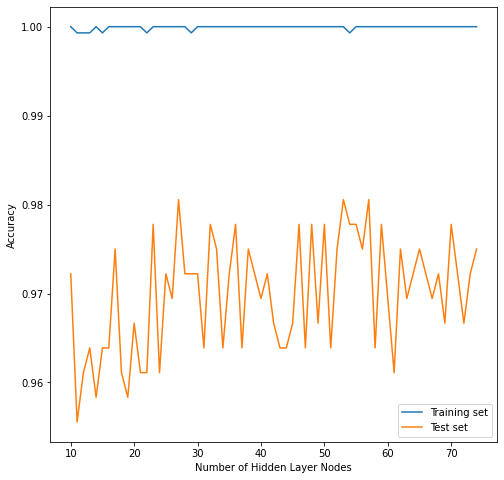

In [ ]:
test_score = []
train_score = []
# size = np.range(5,25)
for n in range(10,75):
    nn2 = MLPClassifier(hidden_layer_sizes=(n+1), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01, random_state=40)
    nn2.fit(X_train,y_train)
    train_score.append(nn2.score(X_train,y_train))
    test_score.append(nn2.score(X_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(range(10,75),train_score)
plt.plot(range(10,75), test_score)
plt.xlabel('Number of Hidden Layer Nodes')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

As the number of nodes in the hidden layer increases both the accuracy of the training and test set increases. The test accuracy remains closer to one no matter how many nodes there are in the hidden layer but the test accuracy fluctuates although within the same range (0.96 and 0.98). 



### **2)Nonlinearity Choice**

In [ ]:
nn3 = MLPClassifier(max_iter=1300, alpha=1e-4,activation='relu' ,solver='sgd', learning_rate_init=.01, random_state=40)
nn3.fit(X_train,y_train)

print("Accuracy of train:",nn3.score(X_train,y_train))
print("Accuracy of test:",nn3.score(X_test, y_test))


Accuracy of train: 1.0
Accuracy of test: 0.9694444444444444


In [ ]:
nn4 = MLPClassifier(max_iter=1300, alpha=1e-4,activation='logistic' ,solver='sgd', learning_rate_init=.01, random_state=40)
nn4.fit(X_train,y_train)

print("Accuracy of train:",nn4.score(X_train,y_train))
print("Accuracy of test:",nn4.score(X_test, y_test))

Accuracy of train: 0.9972164231036882
Accuracy of test: 0.9694444444444444


In [ ]:
nn5 = MLPClassifier(max_iter=1300, alpha=1e-4,activation='tanh' ,solver='sgd', learning_rate_init=.01, random_state=40)
nn5.fit(X_train,y_train)

print("Accuracy of train:",nn5.score(X_train,y_train))
print("Accuracy of test:",nn5.score(X_test, y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9777777777777777


All of the models have the problem of overfitting but the best activation method is 'tanh' as it it gives the highest training accuracy when all other hyperparameters are fixed and only overfits by 0.023 wheras the other two neural network models overfit by around 0.03.

### **3) Optimization Algorithm**



In [ ]:
nn6 = MLPClassifier(max_iter=1300, alpha=1e-4,activation='relu' ,solver='sgd', learning_rate_init=.01,random_state=40)
nn6.fit(X_train,y_train)

print("Accuracy of train:",nn6.score(X_train,y_train))
print("Accuracy of test:",nn6.score(X_test, y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9666666666666667


In [ ]:
nn7 = MLPClassifier(max_iter=1300, alpha=1e-4,activation='relu' ,solver='adam', learning_rate_init=.01,random_state=40)
nn7.fit(X_train,y_train)

print("Accuracy of train:",nn7.score(X_train,y_train))
print("Accuracy of test:",nn7.score(X_test, y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9611111111111111


'sgd' refers to stochastic gradient descent. This optimization algorithm gives a better result. As it overfits the least. But, ‘adam’ also known as thestochastic gradient-based optimizer algorithm's likelihood of overfitting is not too far off from that.

### **4) Test Size**

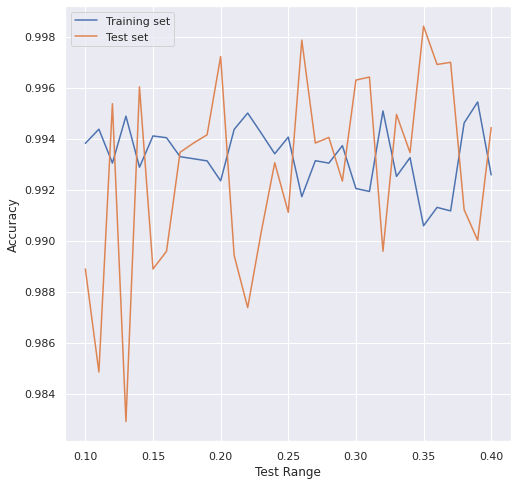

In [ ]:
test_score = []
train_score = []
test_range = np.arange(0.1,0.4,0.01)
for tr in test_range:
    X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(X_scaled,y_digits,test_size=tr)
    nn8 = MLPClassifier(max_iter=2000, alpha=1e-4,activation='relu' ,solver='sgd', learning_rate_init=.01,random_state=40)
    nn8.fit(X_train,y_train)
    train_score.append(nn8.score(X_trainnew,y_trainnew))
    test_score.append(nn8.score(X_testnew,y_testnew))

plt.figure(figsize = (8,8))
plt.plot(test_range,train_score)
plt.plot(test_range, test_score)
plt.xlabel('Test Range')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

It looks like the proportion of the training and test model does not affect the Neural Network model as it the training and test accuracy seem to fluctuate between the same range no matter what the proportions are.

# **Comparing The Methods**

Comparing how well decision trees, random forests and neaural networks work on the same set of data is hard as it really depends on the fixed hyperparameters. The first two methods gave a training/test score ranging between roughly 0.75 and 0.9. And the neural network models almost always had their training accuracy at 100% and test accuracy usually not below 96%. In conclusion, what I found most interesting is that as long as we're able to find out the values of hyperparameters where we will get the highest training/test accuracy with the least amount of overfitting, any of these three methods will be good.